# 1. Market Data Analysis & Volatility Measurement


In [1]:
import pandas as pd 
import numpy as np 
import yfinance as yf
from arch import arch_model
import matplotlib.pyplot as plt

## Fecthing Market Data

In [2]:
ticker = 'AAPL'
data = yf.download(ticker, start='2020-01-01', end='2023-01-01')
data.head()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-02,72.620827,72.681274,71.373203,71.627077,135480400
2020-01-03,71.914818,72.676447,71.689957,71.847118,146322800
2020-01-06,72.487862,72.526549,70.783263,71.034724,118387200
2020-01-07,72.146935,72.753816,71.926907,72.497522,108872000
2020-01-08,73.307526,73.609760,71.849548,71.849548,132079200


## Calculating Volatility

### Historical Volatility

In [3]:

def analyze_volatility(returns):
    results = {}
    
    results['historical_vol'] = returns.std() * np.sqrt(252)
    return results

returns = data[('Close', 'AAPL')].pct_change().dropna()

print("Historical Volatility:", analyze_volatility(returns)['historical_vol'])



Historical Volatility: 0.36933354661698875


### Garch Model For Forcasting

In [4]:
garch_model = arch_model(returns, vol='Garch', p=1, q=1, rescale=False)
garch_fit = garch_model.fit(disp='off')
garch_forecast = garch_fit.forecast(horizon=5).variance.iloc[-1] / 100

print("GARCH 5-day Variance Forecast:", garch_forecast)

GARCH 5-day Variance Forecast: h.1    0.000005
h.2    0.000005
h.3    0.000005
h.4    0.000005
h.5    0.000005
Name: 2022-12-30 00:00:00, dtype: float64


### Rolling Volatility


In [5]:
results = {}
results['rolling_30day'] = returns.rolling(window=30).std() * np.sqrt(252)
results


{'rolling_30day': Date
 2020-01-03         NaN
 2020-01-06         NaN
 2020-01-07         NaN
 2020-01-08         NaN
 2020-01-09         NaN
                 ...   
 2022-12-23    0.302577
 2022-12-27    0.296170
 2022-12-28    0.305488
 2022-12-29    0.316994
 2022-12-30    0.317457
 Name: ('Close', 'AAPL'), Length: 755, dtype: float64}

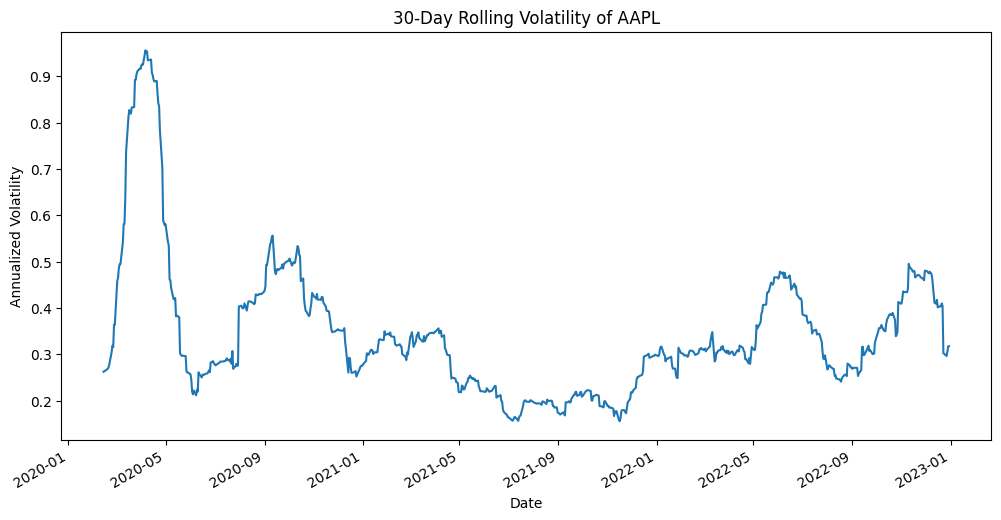

In [6]:
# Plot the 30-day rolling volatility for AAPL
plt.figure(figsize=(12, 6))
results['rolling_30day'].plot(title='30-Day Rolling Volatility of AAPL')
plt.ylabel('Annualized Volatility')
plt.show()

In [7]:
import requests
from bs4 import BeautifulSoup
from transformers import pipeline
from urllib.parse import urljoin
import time

None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.
None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.


# 2. Regulatory Change Monitoring & Impact Analysis

## Regulatory announcements

In [9]:
# Example regulator URLs (replace with actual URLs as needed)
regulator_urls = {
    "SEC": "https://www.sec.gov/news/pressreleases",
    "FINRA": "https://www.finra.org/media-center/newsreleases",
    "CFTC": "https://www.cftc.gov/PressRoom/PressReleases"
}

for reg, url in regulator_urls.items():
    print(f"Latest press releases for {reg}: {url}")

Latest press releases for SEC: https://www.sec.gov/news/pressreleases
Latest press releases for FINRA: https://www.finra.org/media-center/newsreleases
Latest press releases for CFTC: https://www.cftc.gov/PressRoom/PressReleases


## Impact Analysis

In [10]:

latest_rolling_vol = results['rolling_30day'].iloc[-1]
latest_garch_vol = np.sqrt(garch_forecast.iloc[0] * 252)  

print(f"Latest 30-day Rolling Volatility: {latest_rolling_vol:.4f}")
print(f"Latest GARCH Forecasted Volatility (annualized): {latest_garch_vol:.4f}")

if latest_garch_vol > latest_rolling_vol:
    print("GARCH model forecasts higher future volatility than recent historical volatility.")
else:
    print("GARCH model forecasts lower or similar future volatility compared to recent historical volatility.")

Latest 30-day Rolling Volatility: 0.3175
Latest GARCH Forecasted Volatility (annualized): 0.0343
GARCH model forecasts lower or similar future volatility compared to recent historical volatility.
